In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


https://coding-bootcamps.notion.site/Holiday-Mood-Tracker-2c46ed1efc938057be5fc3181d44f7f2

In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')

In [4]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


### Data Cleaning/ Preprocessing

In [5]:
#df['full_date'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-2562534138.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


In [6]:
df.set_index('datetime', inplace=True)

df = df.sort_index(ascending=False)

In [7]:
print(df.index.is_monotonic_decreasing)

True


In [8]:
print(df.index.is_monotonic_increasing)

False


In [9]:
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


In [10]:
df.shape

(940, 4)

In [11]:
df.dropna(inplace=True)

df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     893 non-null    object
 1   sub_mood    893 non-null    object
 2   activities  893 non-null    object
 3   mood        893 non-null    object
dtypes: object(4)
memory usage: 34.9+ KB


In [14]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,reading | learning | fasting | walk | medita...,Awful
2021-12-03 21:01:00,Friday,focused,reading | learning | prayer | fasting | walk...,Good
2021-12-02 21:10:00,Friday,worried,reading | learning | prayer | fasting | walk...,Bad
2021-12-01 21:46:00,Tuesday,Cool,learning | walk | streaming | youtube | cook...,Amazing
2021-11-04 00:21:00,Sunday,wondering,reading | learning | prayer | fasting | walk...,Normal


In [15]:
df['activities'] = df['activities'].str.split('|')

In [16]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [17]:
df.describe()

,weekday,sub_mood,activities,mood
count,893,893,893,893
unique,7,22,839,5
top,Tuesday,blessed,[Dota 2],Good
freq,131,169,10,470


In [18]:
### Stretch Goals

In [19]:
mood_counts = df['mood'].value_counts()

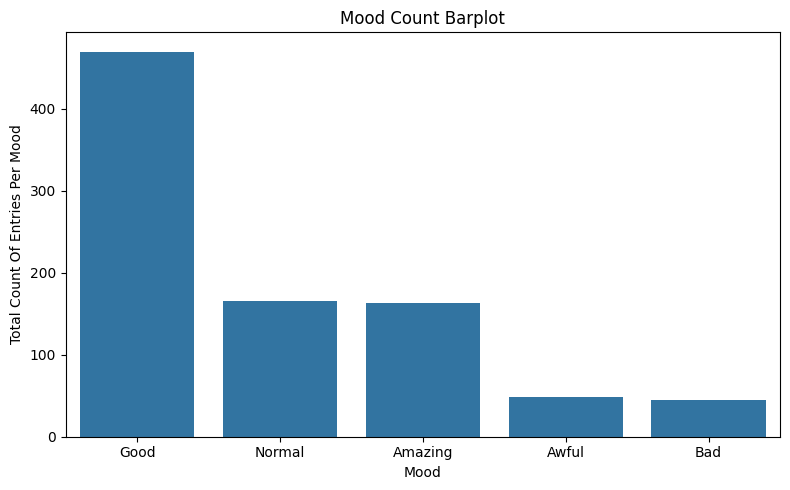

In [20]:
#(Core Goal: A bar chart showing the frequency of each mood category.)
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts)
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [21]:
df_copy = df.copy()

In [22]:
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()

bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

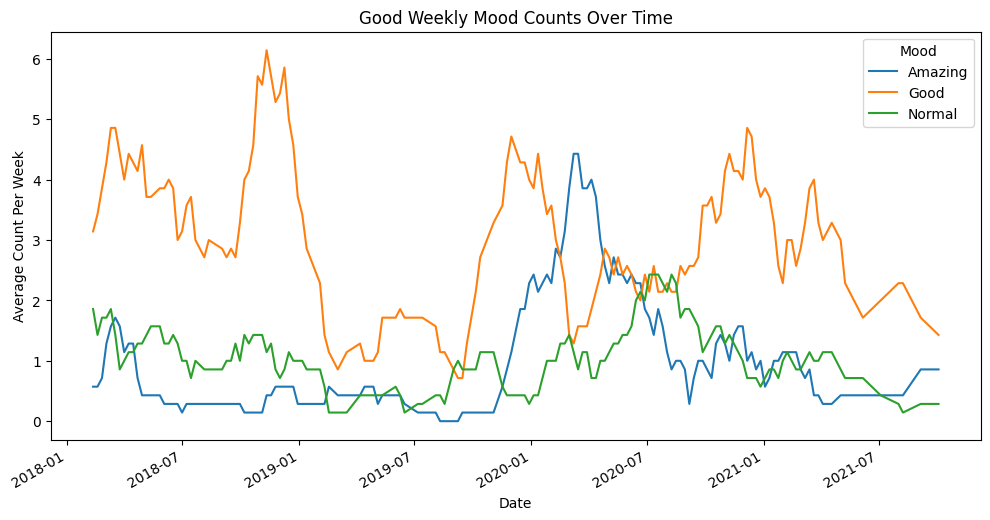

In [23]:
#(Core Goal: A line chart showing a numeric mood score or mood category over time.)
good_smoothed.plot(figsize=(12,6))
plt.title("Good Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


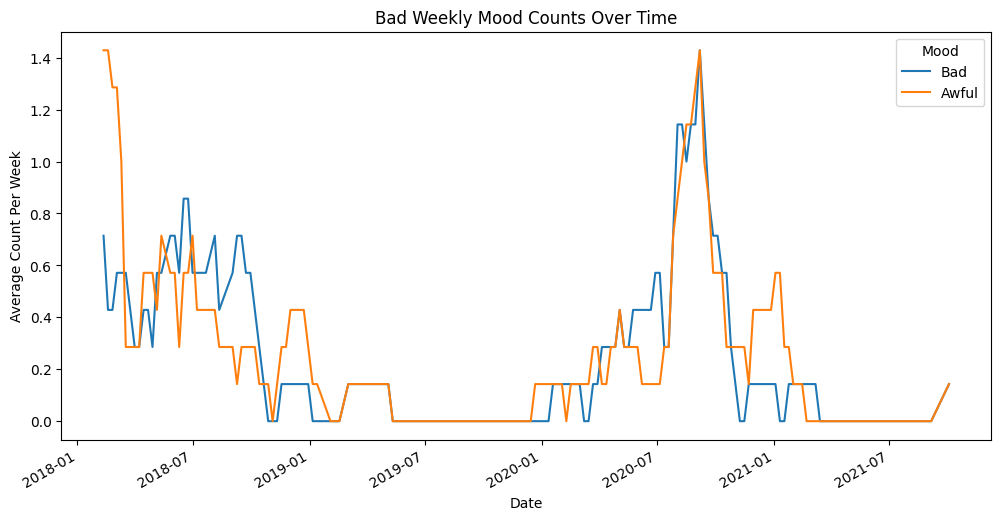

In [24]:
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [26]:
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

df['mood_encoded'] = df['mood'].map(mood_map)

In [27]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
mean_mood_score = df['mood_encoded'].mean()

print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


In [28]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
most_common_mood = df['mood'].mode()

print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


In [29]:
activities_explode_df = df.explode('activities')

activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()

activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [30]:
activities_explode_df['activities'].unique()

array(['reading', 'learning', 'fasting', 'walk', 'meditation', 'shower',
       'writing', 'watching series', 'good meal', 'reddit',
       'language learning', 'streaming', 'youtube', 'cooking', 'cleaning',
       'research', 'new things', 'power nap', 'documentary', 'penpal',
       'coding', 'tutorial', 'prayer', 'podcast', 'audio books', 'songs',
       'email', 'art', 'quran', 'love', 'news update', 'yoga', 'family',
       'repair', 'travel', 'exercise', 'shave', 'movies', 'holotropic',
       'designing', 'trimming', 'poetry', 'write dairy', 'jobs',
       'recording', 'party', 'dota 2', 'weight log', 'keto', 'shopping',
       'video editing', 'friends', 'kaballah', 'gaming', 'phd', 'hiking',
       'hospital'], dtype=object)

In [31]:
activities_sorted = activities_explode_df['activities'].value_counts()
activities_sorted = activities_sorted.sort_values(ascending=False)
top_10_activities = activities_sorted.head(10)

In [32]:
top_10_activities

,count
activities,
youtube,770
streaming,710
good meal,586
audio books,553
reddit,542
meditation,541
watching series,539
walk,521
news update,520


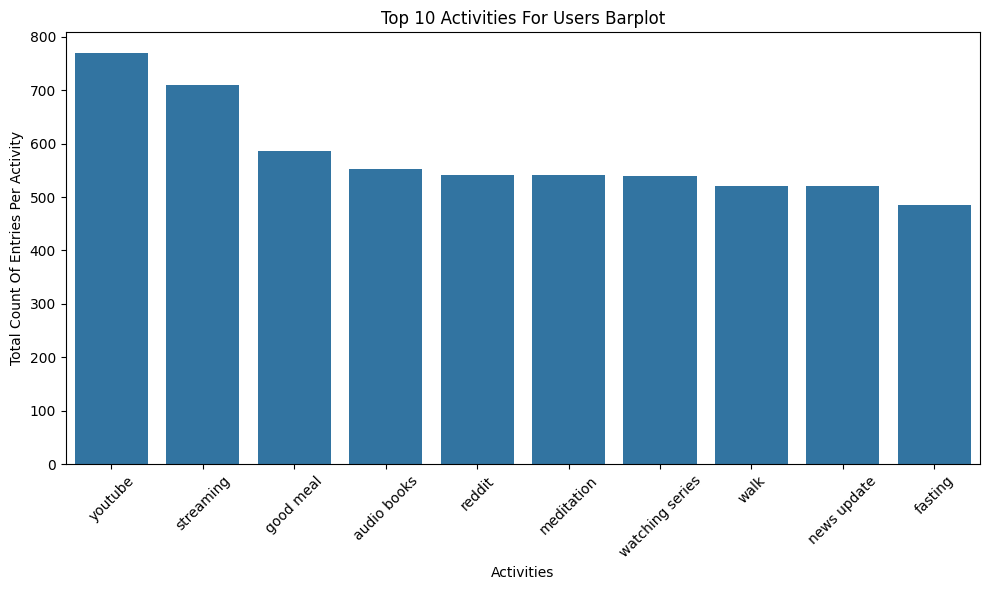

In [33]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities)
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [34]:
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [35]:
medium_freq_activities = activities_sorted[(activities_sorted >= 365) & (activities_sorted <= 405)]

medium_freq_activities.head(3)

,count
activities,
power nap,400
prayer,398
penpal,388


In [36]:
activities_ascending_sorted = activities_sorted.sort_values(ascending=True)
bottom_5_activities = activities_ascending_sorted.head(5)

bottom_5_activities

,count
activities,
video editing,3
hiking,3
hospital,4
party,6
phd,7


### Stretch Goals

In [37]:
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal'
    ]

activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)

activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [38]:
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

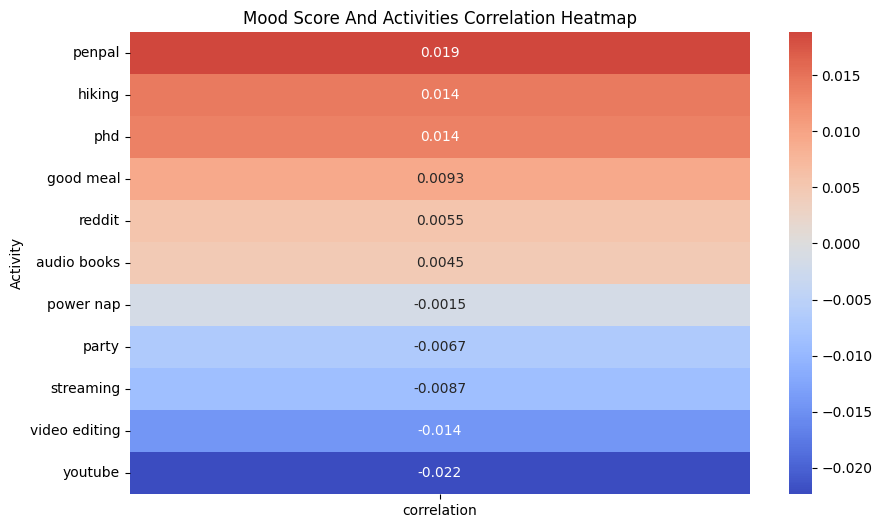

In [39]:
#Stretch Goals: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [45]:
df.head()

,weekday,sub_mood,activities,mood,mood_encoded,week
datetime,,,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1,2021-11-29/2021-12-05
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4,2021-11-29/2021-12-05
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2,2021-11-29/2021-12-05
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5,2021-11-29/2021-12-05
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3,2021-11-01/2021-11-07


In [46]:
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

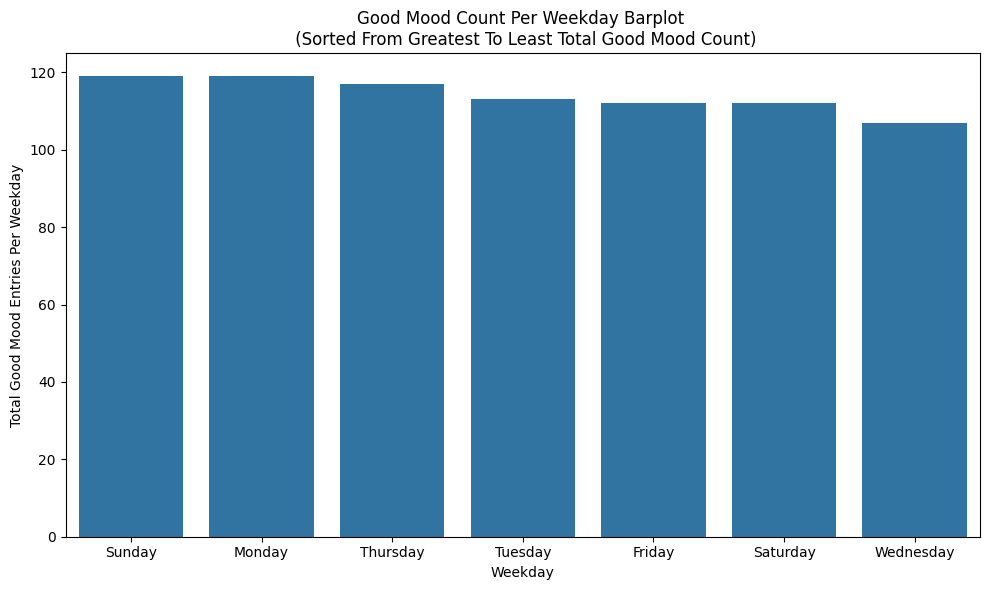

In [47]:
#Strech Goal: Mood trend by time of day or weekday using grouped line/bar charts
good_weekday_counts = df_good_weekday['weekday'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts)
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

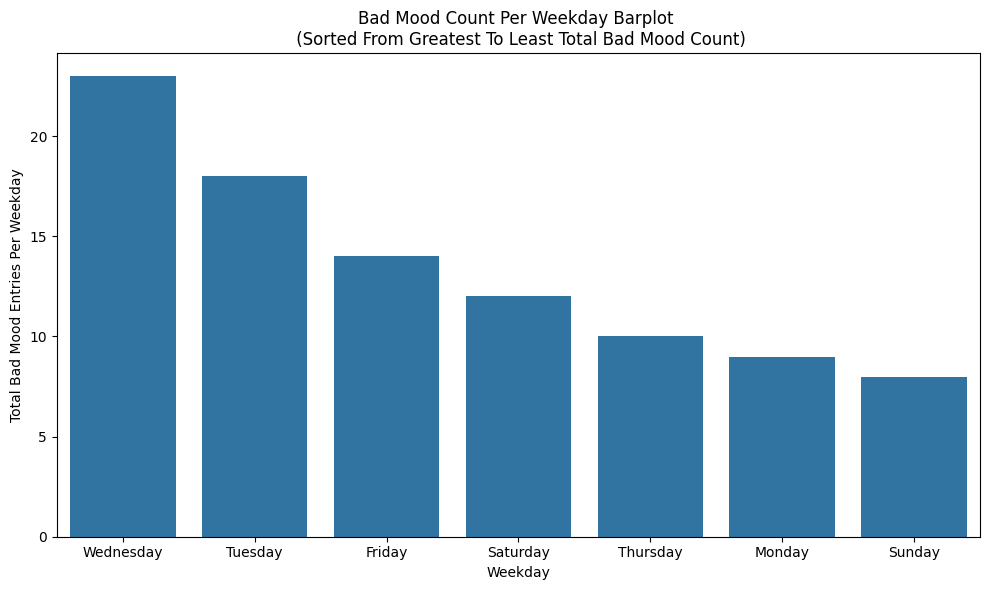

In [48]:
#Stretch Goal: Mood trend by time of day or weekday using grouped line/bar charts
bad_weekday_counts = df_bad_weekday['weekday'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts)
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [49]:
#Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).

#Just a concept still, very iffy if I'm going to use this or not.
def mood_alert(mood_score):
  if mood_score <= 2:
    print(f"I noticed you're having a rough day, have you tried anything to improve your mood?")

  if mood_score <= 3:
    print(f"I see you're in a good mood today.  Keep up the good work!")

  else:
    print(f"Not a valid entry")

In [50]:
df['hour'] = df.index.hour

morning_df = df[(df['hour'] >= 6) & (df['hour'] < 12)]

evening_df = df[(df['hour'] >= 17) & (df['hour'] <= 23)]

/tmp/ipython-input-1141753654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)


Text(0, 0.5, 'Count Of Users')

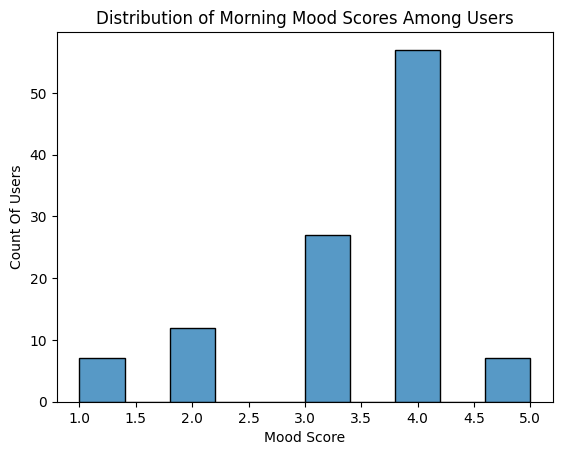

In [51]:
#I did this extra chart because it seems useful.
morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
sns.histplot(data=morning_df['mood_encoded'])

plt.title('Distribution of Morning Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')

/tmp/ipython-input-2628990834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)


Text(0, 0.5, 'Count Of Users')

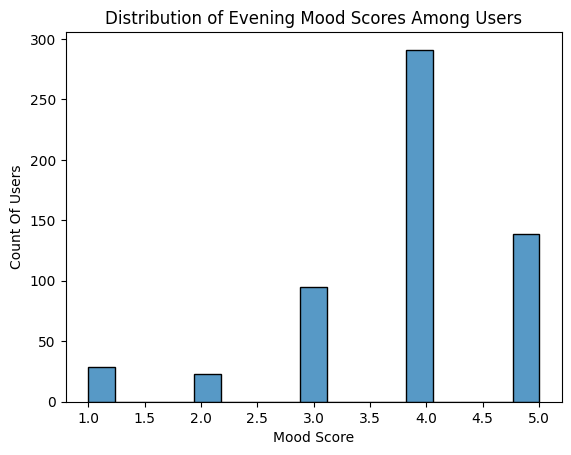

In [52]:
#I did this extra chart because it seems useful.
evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)
sns.histplot(data=evening_df['mood_encoded'])

plt.title('Distribution of Evening Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')